In [22]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
import matplotlib as mpl
import matplotlib.pyplot as pylab
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 1. calculate average value per zipcode 

In [2]:
import os
os.getcwd()

'/Users/isabellopez/Desktop/Desktop - Isabel’s MacBook Pro/Research_groundwater/analysis'

In [5]:
df= pd.read_csv('wells_zipcodes_DomHH.csv')



all_zipcodes = df['Zipcode'].unique()

value=[]


for  zipcode in all_zipcodes:
    temp_df= df[df['Zipcode']==zipcode]
    value+=[temp_df['Dom_HH'].sum()]



In [6]:
print(len(value))

367


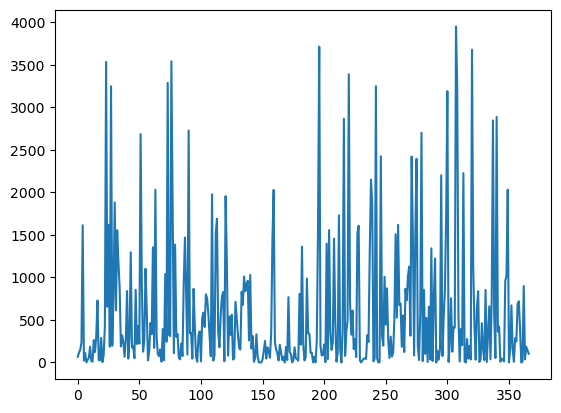

In [7]:
plt.plot(value)

# 2. convert zipcode boundaries to shapefile

In [4]:
# processing of raw data only has to be done once

# master_data = gpd.read_file('tl_2016_us_zcta510/tl_2016_us_zcta510.shp')
# master_data.head()

# zipcode_filtered= master_data[master_data['ZCTA5CE10'].astype(int).isin(all_zipcodes)]
# zipcode_filtered.to_file('zipcode_polygon.shp')

In [9]:
master_data = gpd.read_file('../AGU_data/census_zipcode/central_valley_zip.shp')
master_data.head()

Zipcode                                           geometry
0   94514  POLYGON ((-137798.626 -21072.462, -137753.179 ...
1   95669  POLYGON ((-87179.121 56293.050, -87172.122 562...
2   95901  MULTIPOLYGON (((-124077.016 149359.370, -12404...
3   95974  POLYGON ((-160902.018 163396.734, -160934.773 ...
4   95979  POLYGON ((-229918.232 136775.281, -229954.603 ...

# 3. combine 1. and 2. into a dataframe

In [10]:
master_data['Total_value']=np.nan

zip_dict = {all_zipcodes[i]:value[i] for i in range(len(value))}

for i in range(len(master_data)):
    zip_i= int(master_data.loc[i,'Zipcode'])
    if zip_i in zip_dict.keys():
        master_data.loc[i, 'Total_value']= zip_dict[zip_i]
    
    

In [11]:
master_data.head()

Zipcode                                           geometry  Total_value
0   94514  POLYGON ((-137798.626 -21072.462, -137753.179 ...   309.038604
1   95669  POLYGON ((-87179.121 56293.050, -87172.122 562...   362.496155
2   95901  MULTIPOLYGON (((-124077.016 149359.370, -12404...  1870.604655
3   95974  POLYGON ((-160902.018 163396.734, -160934.773 ...     0.539973
4   95979  POLYGON ((-229918.232 136775.281, -229954.603 ...   267.859459

# 4. plot background

In [13]:
central_valley_image= rasterio.open('../AGU_data/Central_Valley.tif')
print(central_valley_image.crs)


EPSG:4326


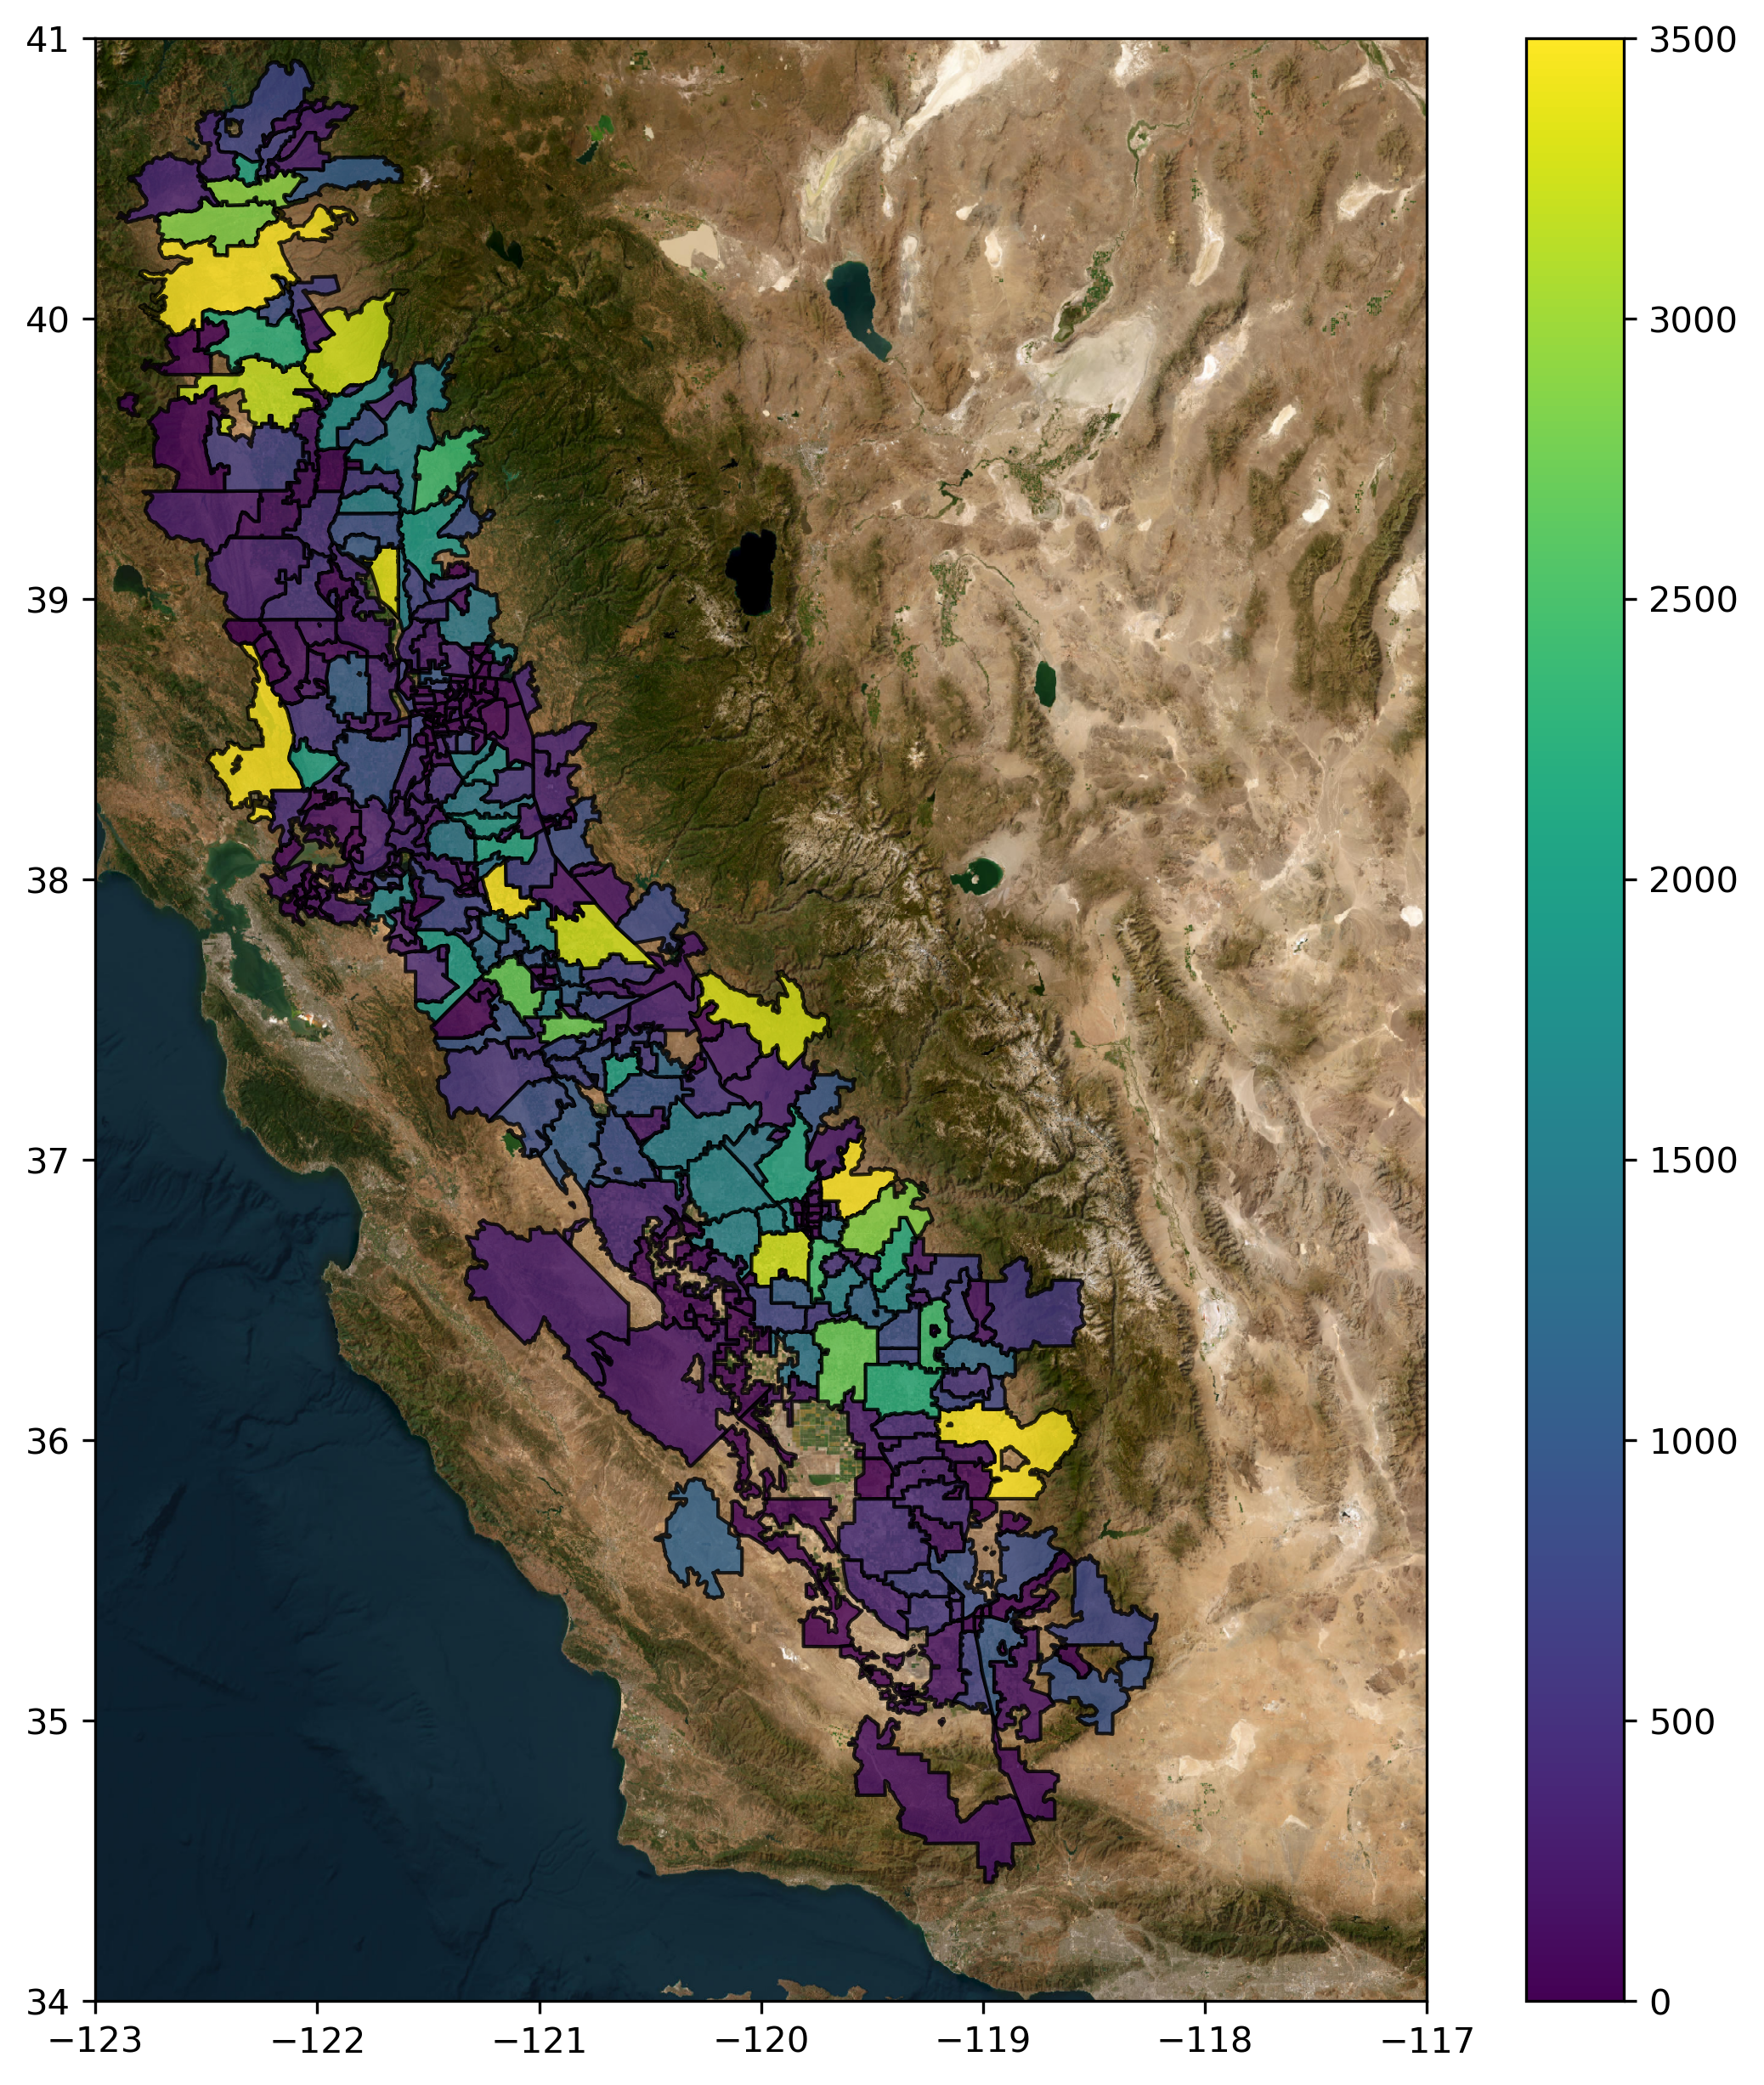

In [35]:
fig, ax=plt.subplots(figsize=(10,10), dpi= 300)
rasterio.plot.show(central_valley_image.read(), ax= ax,transform = central_valley_image.transform)
master_data.to_crs(central_valley_image.crs).plot('Total_value', cmap='viridis', 
                                                  norm = mpl.colors.Normalize(vmin=0, vmax=3500), alpha=0.8,
                                                  legend= True, ax=ax, edgecolor='black')
plt.xlim(-123,-117)
plt.ylim(34,41)

# plt.savefig('central_valley_domestic_wells.png', bbox_inches='tight')



